In [1]:
# copy dataloader and pynx code with notebook
# load screenshot images into notebook

In [2]:
# Run this cell first

datadir='/dls/b16/data/2022/mm30546-1/'

import sys
sys.path
#sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from matplotlib.pyplot import *
#%matplotlib nbagg
%matplotlib notebook
from numpy import *
##%matplotlib inline
from dlstools import dataloader
from dlstools.dataloader import vec2mat

d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus2m_path_template)

import ipywidgets as widgets
import matplotlib.pyplot as plt
#import numpy as np
%matplotlib notebook
# modified volume slicer with optional levels

from PIL import Image

def volume_slicer(vol_dat, levels = None, labels=''):
    #modified volume slicer: pass optional levels or labels (string or list of strings)
    
    if type(labels) == str:  # create list of strings if string is given
        labels = [labels] * vol_dat.shape[0]
    # pass list of [lower level, ipper level] for levels if not autoscale
    fig = plt.figure()
    ax = fig.add_subplot(111)
    (i_max, x_max, y_max)  = vol_dat.shape
    if levels == None:
        im1 = ax.imshow(vol_dat[0])
        
    else:    
        im1 = ax.imshow(vol_dat[0], vmin = levels[0], vmax = levels[1])
        
    fig.colorbar(im1); 


    @widgets.interact(index=(0, i_max-1, 1))

    def update(index = 0):  
        im1.set_data(vol_dat[int(index)])
        ax.set_title(labels[index])
        if levels == None:
            im1.autoscale()
            
            
def create_mask(image_size, prm_list, mask_type = 'square', minval = 0.0):
    '''
    Create a mask. Use minval between 0 and 1 to be able to see mask on image for diagnostics
    Parameters: 
        'square': [icen, jcen, width]
        'disk': [icen, jcen, width]
    '''
    
    if len(image_size) == 2:
        size = image_size
    else:
        size = image_size.shape
        size = size[0:2]
    
    mask = np.zeros(size) + minval
    
    if mask_type == 'square':
        [icen, jcen, wid] = prm_list
        mask[icen-int(np.floor(wid/2)):icen+int(np.ceil(wid/2)), jcen-int(np.floor(wid/2)):jcen+int(np.ceil(wid/2))] = 1
    
    if mask_type == 'disk':
        [icen, jcen, wid] = prm_list
        ii, jj = np.indices(size)
        radius_sq = (ii-icen)**2 + (jj-jcen)**2
        mask[radius_sq <= wid**2 ] = 1

    return(mask)

=== Importing dlstools package


/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/scisoftpy/_external/tifffile.py:8121: UserWarning: No module named 'scisoftpy._external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


## logbook b16-33 p148 (1134_Binder1.pdf)

start with CdWO4 090 Br K edge

Old -BromoAdamantane/Thiourea

#724-#725 absoption scans - peak horizontal E~13499

go to 13500 eV (i.e. +1 eV) j.phys.chem.lett 2011 2 2346: used ~E+5 eV

images look excellent with new analyser (with low signal/high dark counts) but can see scratches on crystal

start using .dat files but change to nexus... then change back (NeXus write problem)

#724,5 nice linear dichroism

analyser in - check biref vs energy for three energies (#805-#832)

bromocyclohexane - scan temp #918-919 Tc~ 233K (expected). chi = 45, phi = 0; nothing!

#1-bromoadamantane/thiourea temperature scans - need to analyse - no ROI

Back to BromoAdamantane/Thiourea with CdWO4 090 analyser, then compare with Si analyser


#391724  energy rc checkrc_beamok ai2 metadata


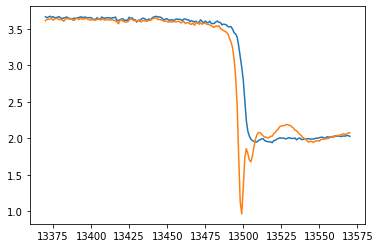

In [3]:
# firt DBA crystal - good but structured
d(391724)
print(d)
figure()
plot(d.energy, d.ai2)
d(391725)
plot(d.energy, d.ai2)

In [4]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/b16/data/2022/mm30546-1/%i.nxs'

=== Failed to create DataFrame from data - create empty DataFrame
scan energy 13400 13540 0.5 rc checkbeam ai2 0.1


<IPython.core.display.Javascript object>


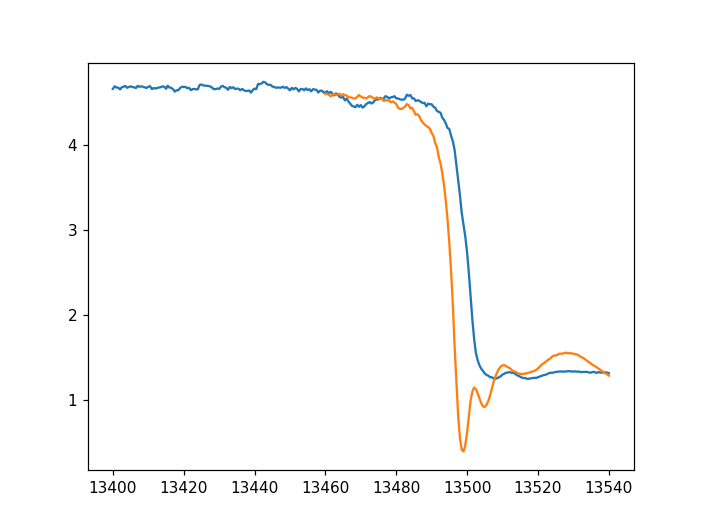

=== Failed to create DataFrame from data - create empty DataFrame


In [5]:
n = pdnx(p % 391745) # chi=0 (horiz.)
#print(n.nx.tree)
print(n.nx.entry.diamond_scan.scan_command)
figure()
plot(np.array(n.nx.entry.instrument.energy.value), np.array(n.nx.entry.instrument.ai2.value))
n = pdnx(p % 391746) # chi=90 (vert.)
plot(np.array(n.nx.entry.instrument.energy.value), np.array(n.nx.entry.instrument.ai2.value))


In [6]:
#n = pdnx(p % 391816) # beam off
dark = 142.915e6 # from #816
n = pdnx(p % 391819) # beam on, sample out
print(n.nx.entry.diamond_scan.scan_command)
no_sample = np.mean(np.array(n.nx.entry.instrument.ipp2roi1.ipp2roi1_sum-dark))
no_sample

=== Failed to create DataFrame from data - create empty DataFrame
scan x 1 10 1 ipp2 4000 ipp2roi1


5338996.1

=== Failed to create DataFrame from data - create empty DataFrame
scan chi -180 115 5 ai1 rc checkbeam ipp2 4000 ipp2roi1


<IPython.core.display.Javascript object>


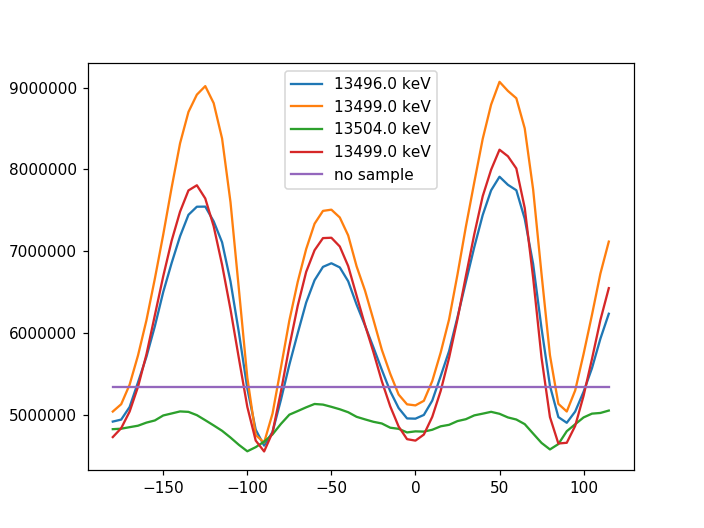

=== Failed to create DataFrame from data - create empty DataFrame
scan chi -180 115 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan chi -180 115 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan chi -180 115 5 ai1 rc checkbeam ipp2 4000 ipp2roi1


In [7]:
# chi scans with 1-bromoadamantane/thiourea as test sample for CdZO4 analyser
# small ROI (images in tiff files)
# best energy is 13499 eV

dark = 142.915e6
n = pdnx(p % 391805) 
print(n.nx.entry.diamond_scan.scan_command)
figure()
enstr = str('%.1f keV' % n.nx.entry.instrument.energy.value)
plot(np.array(n.nx.entry.instrument.chi.value), np.array(n.nx.entry.instrument.ipp2roi1.ipp2roi1_sum-dark), label=enstr)


n = pdnx(p % 391815) 
print(n.nx.entry.diamond_scan.scan_command)
enstr = str('%.1f keV' % n.nx.entry.instrument.energy.value)
plot(np.array(n.nx.entry.instrument.chi.value), np.array(n.nx.entry.instrument.ipp2roi1.ipp2roi1_sum-dark), label=enstr)

n = pdnx(p % 391827) 
print(n.nx.entry.diamond_scan.scan_command)
enstr = str('%.1f keV' % n.nx.entry.instrument.energy.value)
plot(np.array(n.nx.entry.instrument.chi.value), np.array(n.nx.entry.instrument.ipp2roi1.ipp2roi1_sum-dark), label=enstr)

n = pdnx(p % 391832) 
print(n.nx.entry.diamond_scan.scan_command)
enstr = str('%.1f keV' % n.nx.entry.instrument.energy.value)
plot(np.array(n.nx.entry.instrument.chi.value), np.array(n.nx.entry.instrument.ipp2roi1.ipp2roi1_sum-dark), label=enstr)


plot(np.array(n.nx.entry.instrument.chi.value), np.array(n.nx.entry.instrument.chi.value)*0 + no_sample, label='no sample')
legend()

=== Failed to create DataFrame from data - create empty DataFrame
scan phi -90 90 5 ai1 rc checkbeam ipp2 4000 ipp2roi1


<IPython.core.display.Javascript object>


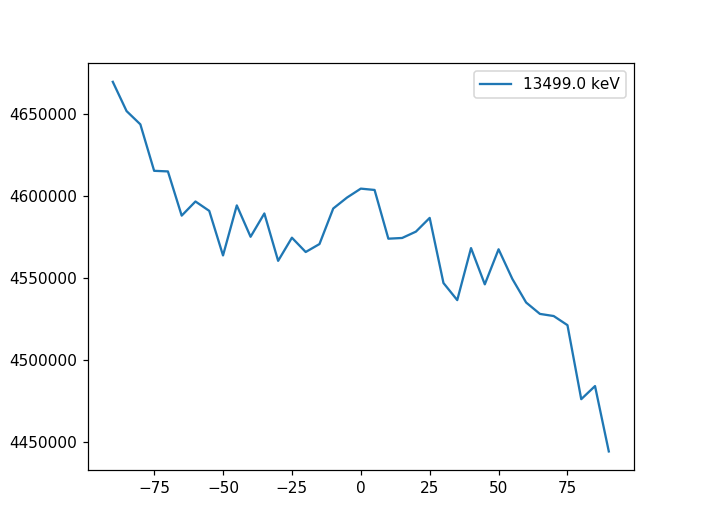

In [8]:
#phi scan - almost flat - ok
dark = 142.915e6
n = pdnx(p % 391840) 
print(n.nx.entry.diamond_scan.scan_command)
figure()
enstr = str('%.1f keV' % n.nx.entry.instrument.energy.value)
plot(np.array(n.nx.entry.instrument.phi.value), np.array(n.nx.entry.instrument.ipp2roi1.ipp2roi1_sum-dark), label=enstr)
legend()

<IPython.core.display.Javascript object>


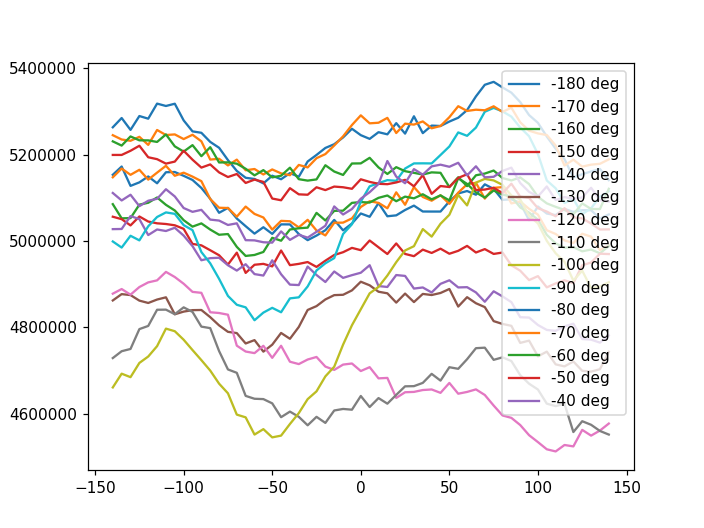

=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create DataFrame from data - create empty DataFrame
scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1
=== Failed to create Dat

In [9]:
#CuBr2
#night21oct2022a
#stopped after 886 - no obvious error
# sample seems too thick. measurements done at lower photon energy 13496 eV

#CuBrO2 13496eV
#date: 21 sept 2022 (not october!)
# 390871-
#for chival in arange(-180, 111, 10): # 30 steps
#    pos chi chival
#    scan phi -140 140 5 ai1 rc checkbeam ipp2 4000 ipp2roi1 #56 points

# script stopped - no error


dark = 142.915e6

figure()
for scan in range(391871, 391886):
    n = pdnx(p % scan) 
    print(n.nx.entry.diamond_scan.scan_command)
    chistr = str('%.0f deg' % n.nx.entry.instrument.chi.value)
    plot(np.array(n.nx.entry.instrument.phi.value), np.array(n.nx.entry.instrument.ipp2roi1.ipp2roi1_sum-dark), label=chistr)
    legend()


/dls/b16/data/2022/mm30546-1/ippimages/2022-9-21/ipp_391871_10.TIF


<IPython.core.display.Javascript object>


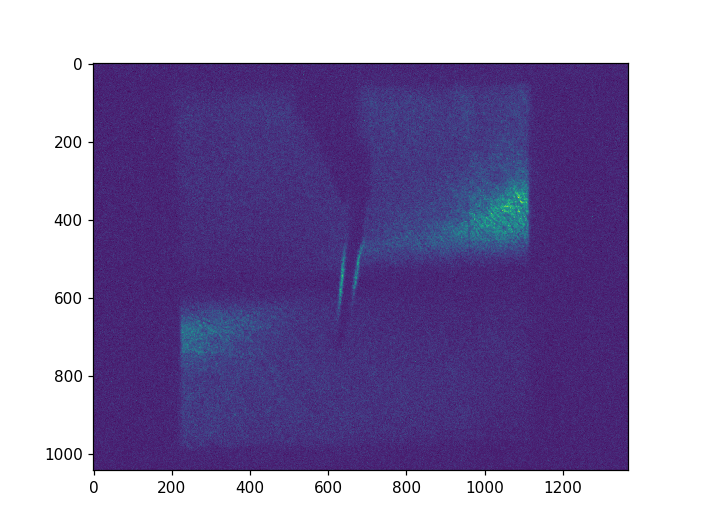

In [10]:
#Images from CuBr2
from PIL import Image
file = 'ippimages/2022-9-21/ipp_391871_10.TIF'
print(datadir+file)

figure()
imdat = np.array(Image.open(datadir+file)); 
imshow(imdat)

<IPython.core.display.Javascript object>


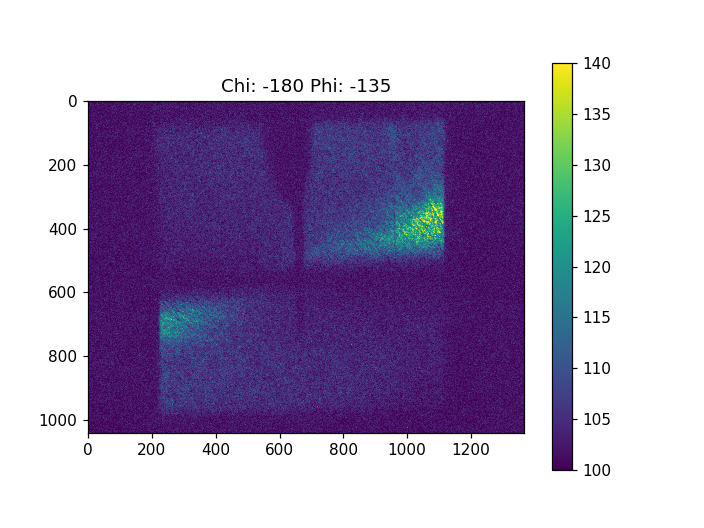

interactive(children=(IntSlider(value=0, description='index', max=839), Output()), _dom_classes=('widget-inter…

In [11]:
#Images from CuBr2
#images vs chi, phi
# 13496 eV
from PIL import Image

ippdate = '2022-9-21'

imstack = []
labels = []

for scan in range(391871, 391886):
    d(scan)
    for imno in range(1, len(d.phi)):

        file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
        imdat = np.array(Image.open(datadir+file))

        imstack += [imdat]
        labels += ['Chi: %.0f Phi: %.0f' % (d.chi,d.phi[imno])]
        
imstack = np.array(imstack)

volume_slicer(imstack, levels = [100, 140], labels = labels)

In [12]:
#day22sept2022a.py

#bromocyclohexane/thiourea

#918
#scan cryo 300 200 -2 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#919
#scan cryo 198 100 2 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1
# stopped T=127.8 - not getting any cooler. no obvious change in signal

#pos chi 0 # bright spot!
#T=127.6 K
#921
#scan phi -90 90 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#pos chi -90
#922
#scan phi -90 90 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
# phi = 90, chi = -90 - looks good - temperature cycle

#391923
#scan cryo 130 262 2 clock chi phi ai1 rc checkbeam ipp2 10000 ipp2roi1
#924
#scan cryo 262 130 2 clock chi phi ai1 rc checkbeam ipp2 10000 ipp2roi1
# sample is icing slightly at low temp.
# very different images after cycling


#pos cryo 132 # keep at 132. struggling to get lower...
#925
#scan phi -90 90 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#pos phi 0
#929
#scan chi -90 90 5 phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#pos phi -90
#scan chi 90 -90 5 phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#pos phi -45
#931
#scan chi -90 90 5 phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#pos chi 80 phi -45
#934
#scan cryo 132 262 2 clock chi phi ai1 rc checkbeam ipp2 10000 ipp2roi1
#935
#scan cryo 262 132 2 clock chi phi ai1 rc checkbeam ipp2 10000 ipp2roi1




<IPython.core.display.Javascript object>


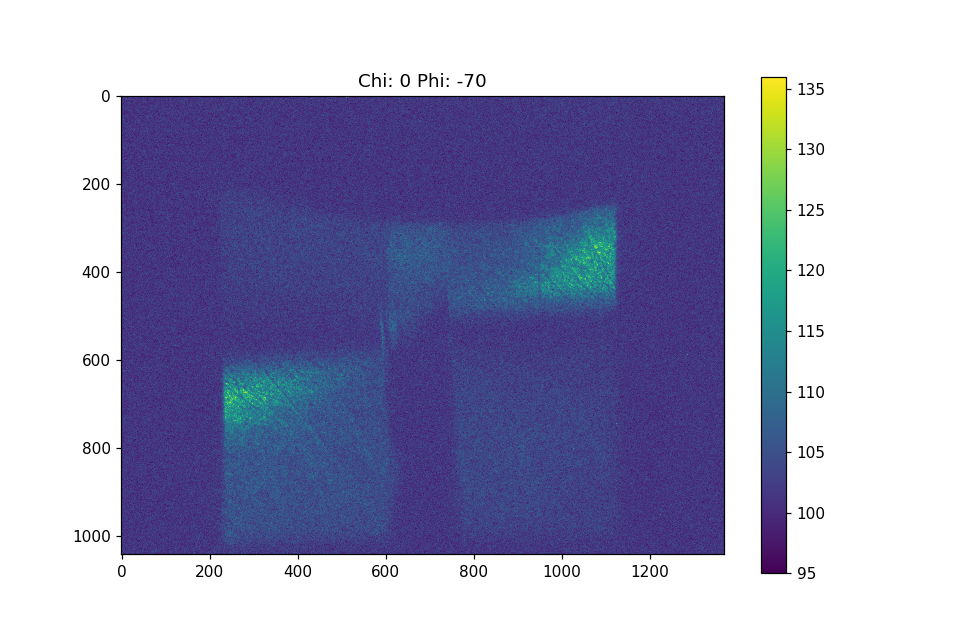

interactive(children=(IntSlider(value=0, description='index', max=36), Output()), _dom_classes=('widget-intera…

In [13]:
#bromocyclohexane/thiourea
# chi=0; phi scan
#13499 eV

from PIL import Image

scan = 391921
d(scan)
npts = len(d.phi)

ippdate = '2022-9-22'

imstack = []
labels = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.chi[imno-1], d.phi[imno-1])]

imstack = np.array(imstack)

volume_slicer(imstack, labels = labels)

<IPython.core.display.Javascript object>


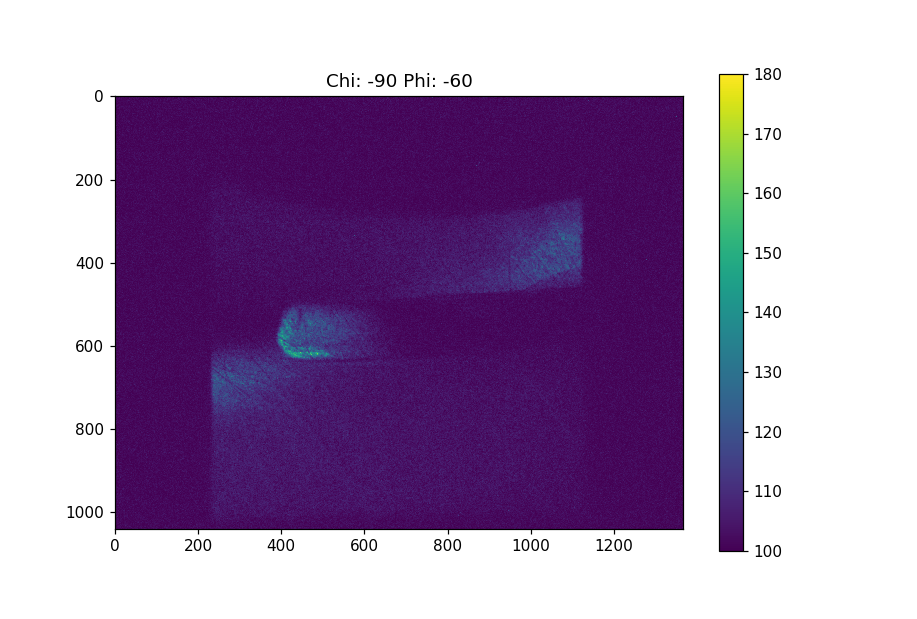

interactive(children=(IntSlider(value=0, description='index', max=36), Output()), _dom_classes=('widget-intera…

In [14]:
#bromocyclohexane/thiourea
# chi=-90; phi scan
from PIL import Image

scan = 391922
d(scan)
npts = len(d.phi)

ippdate = '2022-9-22'

imstack = []
labels = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.chi[imno-1], d.phi[imno-1])]
    
imstack = np.array(imstack)

volume_slicer(imstack, levels = [100, 180], labels = labels)

<IPython.core.display.Javascript object>


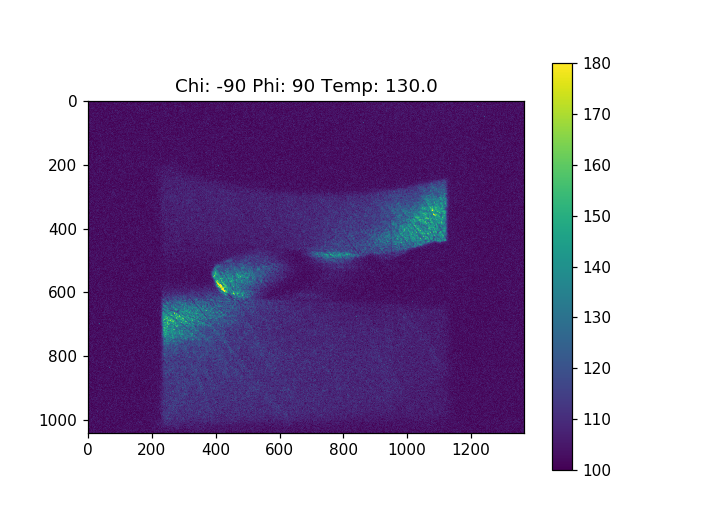

interactive(children=(IntSlider(value=0, description='index', max=66), Output()), _dom_classes=('widget-intera…

In [15]:
#bromocyclohexane/thiourea
# phi = 90, chi = -90 temperature scan
#warming
from PIL import Image

scan = 391923
d(scan)
npts = len(d.rc)

ippdate = '2022-9-22'

imstack = []
labels = []

imstack = []
for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f Temp: %.1f' % (d.chi[imno-1], d.phi[imno-1], d.cryotemp[imno-1])]
    
imstack = np.array(imstack)

volume_slicer(imstack, levels = [100, 180], labels = labels)

<IPython.core.display.Javascript object>


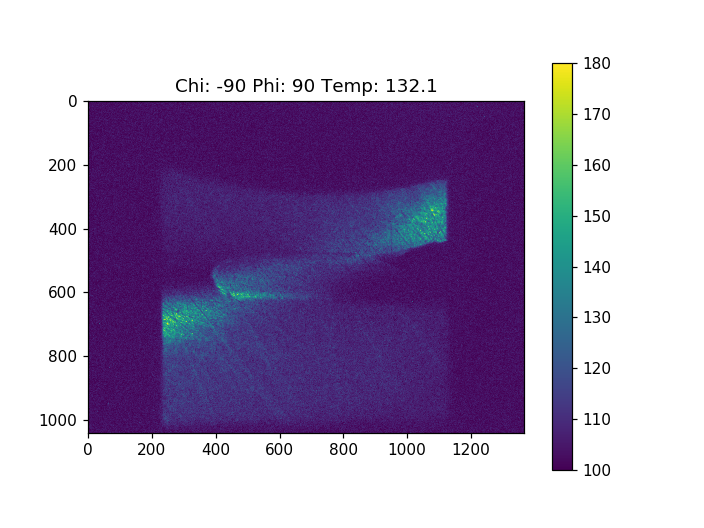

interactive(children=(IntSlider(value=0, description='index', max=65), Output()), _dom_classes=('widget-intera…

In [16]:
#bromocyclohexane/thiourea
# phi = 90, chi = -90 temperature scan
#cooling
from PIL import Image

scan = 391924
d(scan)
npts = len(d.rc)

ippdate = '2022-9-22'

imstack = []
labels = []

imstack = []
for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f Temp: %.1f' % (d.chi[imno-1], d.phi[imno-1], d.cryotemp[imno-1])]

    
imstack = np.array(imstack)

volume_slicer(imstack, levels = [100, 180], labels = labels)

<IPython.core.display.Javascript object>


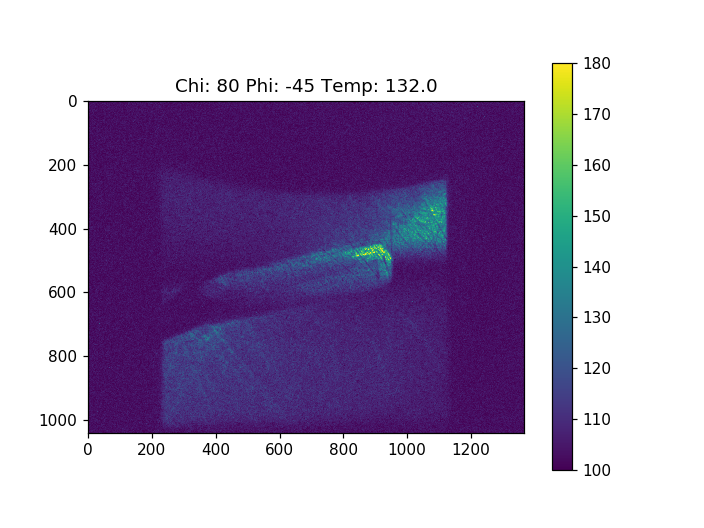

interactive(children=(IntSlider(value=0, description='index', max=65), Output()), _dom_classes=('widget-intera…

In [17]:
#bromocyclohexane/thiourea
#pos chi 80 phi -45 temperature scan
#warming
from PIL import Image

scan = 391934
d(scan)
npts = len(d.rc)

ippdate = '2022-9-22'

imstack = []
labels = []

imstack = []
for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f Temp: %.1f' % (d.chi[imno-1], d.phi[imno-1], d.cryotemp[imno-1])]
    
imstack = np.array(imstack)

volume_slicer(imstack, levels = [100, 180], labels = labels)

<IPython.core.display.Javascript object>


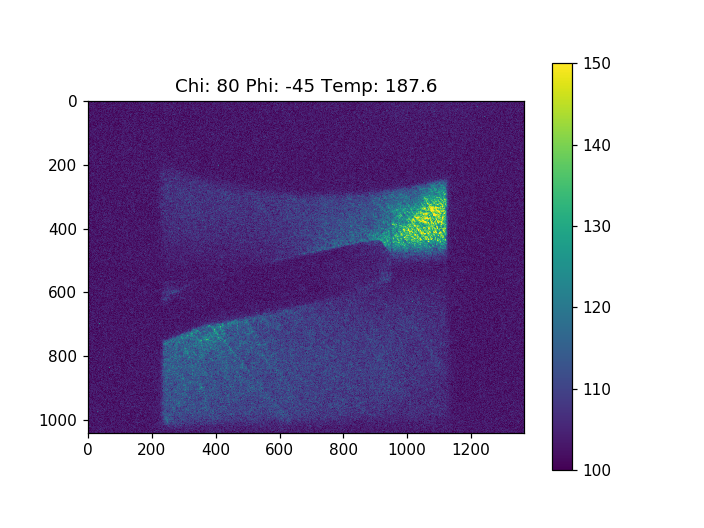

interactive(children=(IntSlider(value=0, description='index', max=65), Output()), _dom_classes=('widget-intera…

In [18]:
#bromocyclohexane/thiourea
#pos chi 80 phi -45 temperature scan
#cooling
from PIL import Image

scan = 391935
d(scan)
npts = len(d.rc)

ippdate = '2022-9-22'

imstack = []
labels = []

imstack = []
for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f Temp: %.1f' % (d.chi[imno-1], d.phi[imno-1], d.cryotemp[imno-1])]
    
imstack = np.array(imstack)

volume_slicer(imstack, levels = [100, 150], labels = labels)

In [19]:
#1-bromoadamantane/thiourea temperature scans

#931943
#scan cryo 300 150 -2 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1

#for i in range(99):
#    scan cryo 150 350 2 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#    scan cryo 350 150 2 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1

# stopped #956 09:06 23/9/22

# dark #961
#pos ehshutter 0
#scan x 1 10 1 clock chi phi ai1 ipp2 4000 ipp2roi1

#sample out, beam on
#964
#scan x 1 10 1 clock chi phi ai1 ipp2 4000 ipp2roi1

76
101
101


<IPython.core.display.Javascript object>


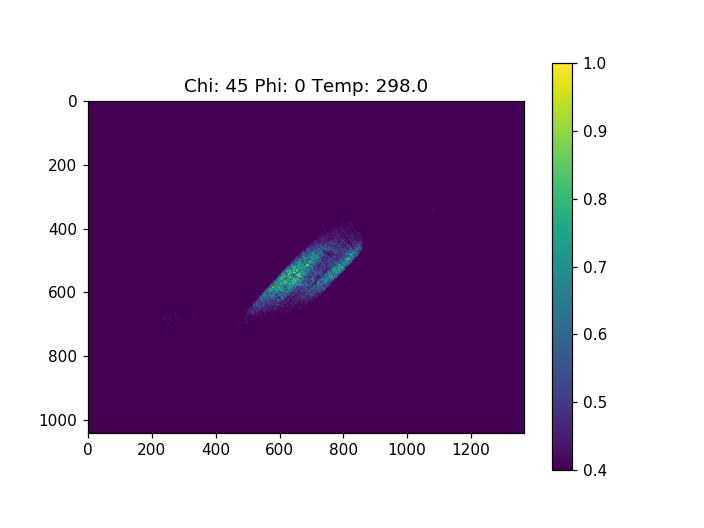

interactive(children=(IntSlider(value=0, description='index', max=277), Output()), _dom_classes=('widget-inter…

In [20]:
#1-bromoadamantane/thiourea temperature scans
#repeated temperature cycles
from PIL import Image

ippdate = ['2022-9-22', '2022-9-23']

imstack = []
labels = []
imstack = []

#scans = range(391943, 391956)
scans = range(391943, 391946)

(iw, jw) =  (1040, 1368)
roi_xmin, roi_xmax, roi_ymin, roi_ymax  = 477, 568, 596, 690
#roi_xmin, roi_xmax, roi_ymin, roi_ymax  = 477, 568, 0, 1300
#roi_xmin, roi_xmax, roi_ymin, roi_ymax = 0, 550, 0, 1368

for scan in scans:

    d(scan)
    npts = len(d.rc)
    print(npts)

    for imno in range(1, npts+1):

        try:
            file = 'ippimages/' + ippdate[0] + '/ipp_%i_%i.TIF' % (scan, imno)
            imdat = np.array(Image.open(datadir+file))
        except:
            file = 'ippimages/' + ippdate[1] + '/ipp_%i_%i.TIF' % (scan, imno)
            imdat = np.array(Image.open(datadir+file))

        imstack += [imdat/d.rc[imno-1]] # normalize to ring current
        #imstack += [imdat[roi_ymin:roi_ymax, roi_xmin:roi_xmax]/d.rc[imno-1]] # normalize to ring current
        
    
        labels += ['Chi: %.0f Phi: %.0f Temp: %.1f' % (d.chi[imno-1], d.phi[imno-1], d.cryotemp[imno-1])]
    
imstack = np.array(imstack)

volume_slicer(imstack, levels = [.4, 1.0], labels = labels)

In [21]:
roi_ymin-roi_ymax

-94

In [22]:
imdat.shape

(1040, 1368)

In [23]:
for scan in range(391724, 393000):
    try:
        d(scan)
        print('#%i: %s: %s' % (scan, d.date, d.cmd))
    except:
        pass

#391724: Wed Sep 21 13:53:06 2022: scan energy 13370 13570 1 rc checkbeam ai2 0.1
#391725: Wed Sep 21 13:58:48 2022: scan energy 13370 13570 1 rc checkbeam ai2 0.1
#391726: Wed Sep 21 14:09:55 2022: rscan mtYaw -0.15 0.15 0.005 ipp2 1000 ipp2max2d
#391727: Wed Sep 21 14:12:44 2022: scan x 1 1 1 ipp2 1000
#391728: Wed Sep 21 14:12:44 2022: scan x 1 1 1 ipp2 1000
#391729: Wed Sep 21 14:13:14 2022: scan x 1 1 1 ipp2 1000
#391730: Wed Sep 21 14:13:33 2022: scan x 1 1 1 ipp2 1000
#391731: Wed Sep 21 14:13:46 2022: scan x 1 1 1 ipp2 1000
#391732: Wed Sep 21 14:14:03 2022: scan x 1 1 1 ipp2 1000
#391733: Wed Sep 21 14:14:25 2022: scan x 1 1 1 ipp2 2000
#391734: Wed Sep 21 14:14:42 2022: scan x 1 1 1 ipp2 2000
#391735: Wed Sep 21 14:19:50 2022: scan x 1 1 1 ipp2 2000
#391736: Wed Sep 21 14:20:26 2022: scan x 1 1 1 ipp2 2000
#391737: Wed Sep 21 14:25:11 2022: scan x 1 1 1 ipp2 2000
#391738: Wed Sep 21 14:26:41 2022: scan x 1 2 1 ipp2 2000
#391739: Wed Sep 21 14:34:30 2022: scan chi -180 115 5 a

#391911: Thu Sep 22 11:53:04 2022: scan chi -180 115 2.5 phi ai1 rc checkbeam ipp2 5000 ipp2roi1
#391912: Thu Sep 22 12:13:24 2022: scan chi -180 115 2.5 phi ai1 rc checkbeam ipp2 5000 ipp2roi1
#391913: Thu Sep 22 12:32:05 2022: scan x 1 10 1 ipp2 5000
#391914: Thu Sep 22 12:33:16 2022: scan x 1 10 1 ipp2 5000
#391915: Thu Sep 22 15:24:50 2022: scan x 1 1 1 ipp2 5000
#391916: Thu Sep 22 15:26:23 2022: scan x 1 1 1 ipp2 5000
#391918: Thu Sep 22 15:35:28 2022: scan cryo 300 200 -2 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#391919: Thu Sep 22 16:00:58 2022: scan cryo 198 100 -2 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#391920: Thu Sep 22 17:00:02 2022: scan x 1 1 1 ipp2 5000
#391921: Thu Sep 22 17:01:27 2022: scan phi -90 90 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#391922: Thu Sep 22 17:06:27 2022: scan phi -90 90 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#391923: Thu Sep 22 17:17:33 2022: scan cryo 130 300 2 clock chi phi ai1 rc checkbeam ipp2 10000 ipp2roi1
#391924: T

#392060: Fri Sep 23 14:33:00 2022: scan x 1 1 1 ipp2 2000
#392061: Fri Sep 23 14:33:12 2022: scan x 1 1 1 ipp2 2000
#392062: Fri Sep 23 14:33:32 2022: scan x 1 1 1 ipp2 2000
#392063: Fri Sep 23 14:33:48 2022: scan x 1 1 1 ipp2 2000
#392064: Fri Sep 23 14:34:03 2022: scan x 1 1 1 ipp2 2000
#392065: Fri Sep 23 14:34:27 2022: scan x 1 1 1 ipp2 2000
#392066: Fri Sep 23 14:34:38 2022: scan x 1 1 1 ipp2 2000
#392067: Fri Sep 23 14:34:53 2022: scan x 1 1 1 ipp2 2000
#392068: Fri Sep 23 14:35:06 2022: scan x 1 1 1 ipp2 2000
#392069: Fri Sep 23 14:35:17 2022: scan x 1 1 1 ipp2 2000
#392070: Fri Sep 23 14:35:46 2022: scan x 1 1 1 ipp2 2000
#392071: Fri Sep 23 14:36:09 2022: scan x 1 1 1 ipp2 2000
#392072: Fri Sep 23 14:36:33 2022: scan x 1 1 1 ipp2 2000
#392073: Fri Sep 23 14:36:45 2022: scan x 1 1 1 ipp2 2000
#392074: Fri Sep 23 14:37:08 2022: scan x 1 1 1 ipp2 2000
#392075: Fri Sep 23 14:38:04 2022: rscan mtYaw -0.02 0.02 0.0005 ipp2 2000 ipp2max2d
#392076: Fri Sep 23 14:45:04 2022: scan x 1 1

#392178: Fri Sep 23 22:27:08 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392179: Fri Sep 23 22:33:55 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392180: Fri Sep 23 22:40:43 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392181: Fri Sep 23 22:47:31 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392182: Fri Sep 23 22:54:19 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392183: Fri Sep 23 23:01:08 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392184: Fri Sep 23 23:07:56 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392185: Fri Sep 23 23:14:45 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392186: Fri Sep 23 23:21:33 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392187: Fri Sep 23 23:28:22 2022: scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392188: Fri Sep 23 23:35:10 2022: scan phi -148 1

#392298: Sat Sep 24 17:45:14 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392299: Sat Sep 24 17:47:18 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392300: Sat Sep 24 17:47:37 2022: scan mtYaw 44.78 44.88 0.01 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392301: Sat Sep 24 17:49:19 2022: scan mtYaw 44.78 44.88 0.002 clock chi phi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392302: Sat Sep 24 17:58:37 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392303: Sat Sep 24 18:12:54 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392304: Sat Sep 24 18:14:54 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392305: Sat Sep 24 18:15:24 2022: scan x 1 1 1 ai1 rc ipp2 10000 ipp2roi1
#392306: Sat Sep 24 18:18:12 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392307: Sat Sep 24 18:24:25 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392308: Sat Sep 24 18:32:06 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392309: Sat Sep 24 18:40:09 2022: scan phi -148 147 4 chi ai1 r

#392392: Sun Sep 25 05:47:05 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392393: Sun Sep 25 05:55:07 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392394: Sun Sep 25 06:03:09 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392395: Sun Sep 25 06:11:12 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392396: Sun Sep 25 06:19:14 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392397: Sun Sep 25 06:27:15 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392398: Sun Sep 25 06:35:17 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392401: Sun Sep 25 10:00:23 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392402: Sun Sep 25 10:01:02 2022: scan x 1 1 1 ai1 rc ipp2 4000 ipp2roi1
#392403: Sun Sep 25 10:03:08 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392404: Sun Sep 25 10:10:44 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2ro

#392488: Sun Sep 25 22:20:09 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392489: Sun Sep 25 22:28:17 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392490: Sun Sep 25 22:36:23 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392491: Sun Sep 25 22:44:30 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392492: Sun Sep 25 22:52:36 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392493: Sun Sep 25 23:00:44 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392494: Sun Sep 25 23:08:51 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392495: Sun Sep 25 23:16:59 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392496: Sun Sep 25 23:25:05 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392497: Sun Sep 25 23:33:11 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
#392498: Sun Sep 25 23:41:17 2022: scan phi -148 1

#392644: Mon Sep 26 13:14:23 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392645: Mon Sep 26 13:23:20 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392646: Mon Sep 26 13:32:34 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392647: Mon Sep 26 13:41:50 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392648: Mon Sep 26 13:51:07 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392649: Mon Sep 26 14:00:22 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392650: Mon Sep 26 14:09:38 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392651: Mon Sep 26 14:18:52 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392652: Mon Sep 26 14:28:07 2022: scan phi -148 147 4 chi ai1 rc checkbeam ipp2 5000 ipp2roi1
#392654: Mon Sep 26 14:38:26 2022: scan x 1 1 1 ipp2 2000
#392655: Mon Sep 26 14:56:05 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 4000 

#392770: Tue Sep 27 00:57:12 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392771: Tue Sep 27 01:04:12 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392772: Tue Sep 27 01:11:11 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392773: Tue Sep 27 01:18:11 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392774: Tue Sep 27 01:25:09 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392775: Tue Sep 27 01:32:10 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392776: Tue Sep 27 01:39:11 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392777: Tue Sep 27 01:46:12 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392778: Tue Sep 27 01:53:14 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392779: Tue Sep 27 02:00:14 2022: scan phi -148 142 10 chi ai1 rc checkbeam ipp2 10000 ipp2roi1
#392780: Tue Sep 27 02:07:16 2

In [24]:
#CuBr2 new sample (Sample 2) - slightly smaller 
#pos chi -90
#978
#scan phi -90 90 5 ipp2 4000 ipp2roi1
# bringt around edges - same as previous sample

#pos chi 0
#979
#scan phi -90 90 5 clock ai1 rc checkbeam ipp2 4000 ipp2roi1

<IPython.core.display.Javascript object>


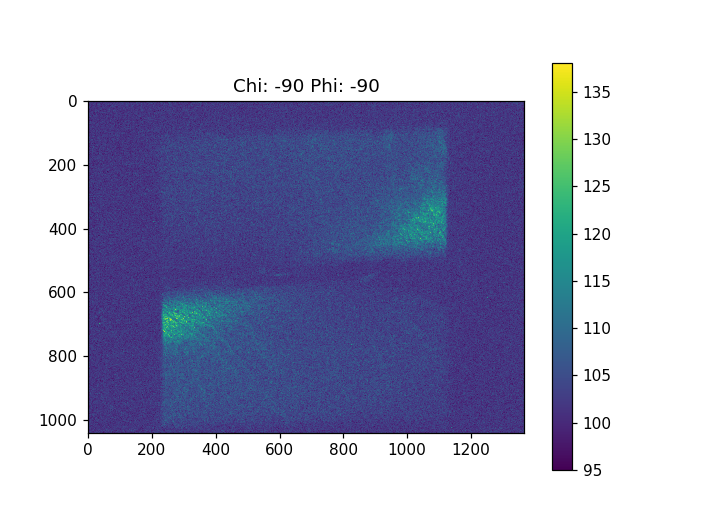

interactive(children=(IntSlider(value=0, description='index', max=36), Output()), _dom_classes=('widget-intera…

In [25]:
#978, 979 CuBr2 phi scans at fixed chi
#980, 984 CuBr2 chi scans at fixed phi

scan = 391978
d(scan)
npts = len(d.phi)

ippdate = '2022-9-23'

imstack = []
labels = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.fc_fcChi, d.phi[imno-1])]
    
imstack = np.array(imstack)

volume_slicer(imstack, labels = labels)

<IPython.core.display.Javascript object>


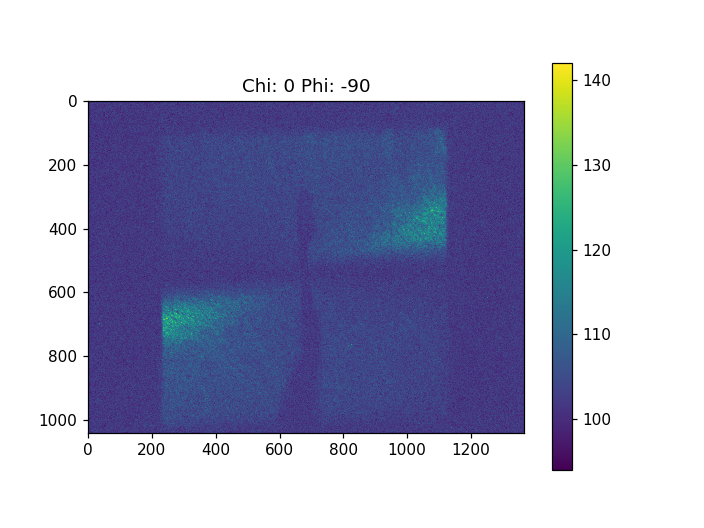

interactive(children=(IntSlider(value=0, description='index', max=36), Output()), _dom_classes=('widget-intera…

In [26]:
#978, 979 CuBr2 phi scans at fixed chi
#980, 984 CuBr2 chi scans at fixed phi

scan = 391979
d(scan)
npts = len(d.phi)

ippdate = '2022-9-23'

imstack = []
labels = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.fc_fcChi, d.phi[imno-1])]
    
imstack = np.array(imstack)

volume_slicer(imstack, labels = labels)

<IPython.core.display.Javascript object>


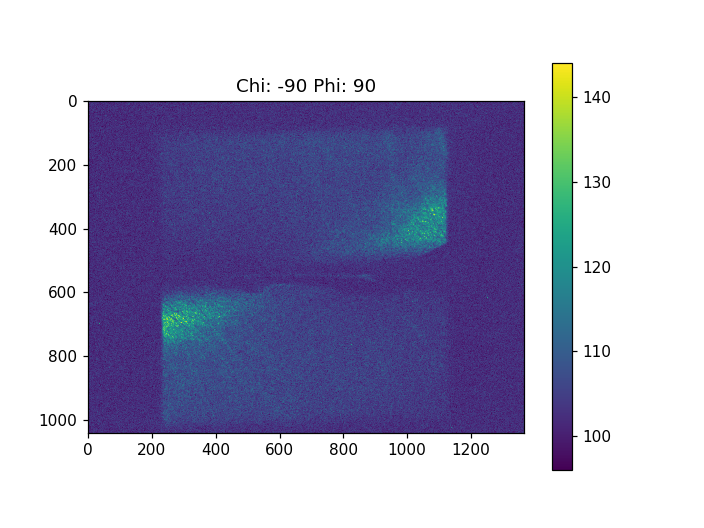

interactive(children=(IntSlider(value=0, description='index', max=90), Output()), _dom_classes=('widget-intera…

In [27]:
#978, 979 CuBr2 phi scans at fixed chi
#980, 984 CuBr2 chi scans at fixed phi

scan = 391980
d(scan)
npts = len(d.chi)

ippdate = '2022-9-23'

imstack = []
labels = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.chi[imno-1], d.fc_fcPhi)]
    
imstack = np.array(imstack)

volume_slicer(imstack, labels = labels)

<IPython.core.display.Javascript object>


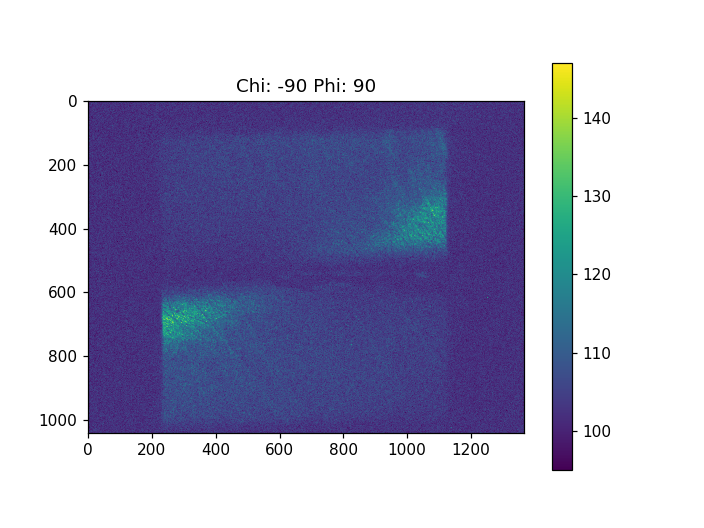

interactive(children=(IntSlider(value=0, description='index', max=90), Output()), _dom_classes=('widget-intera…

In [28]:
#978, 979 CuBr2 phi scans at fixed chi
#980, 984 CuBr2 chi scans at fixed phi

scan = 391984
d(scan)
npts = len(d.chi)

ippdate = '2022-9-23'

imstack = []
labels = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.chi[imno-1], d.fc_fcPhi)]
    
imstack = np.array(imstack)

volume_slicer(imstack, labels = labels)

In [29]:
# back to standard dibromoadamatane reference sample (used for testnig diffrent energies above)
# measure with Si 555 then back to CdWO4 090 analyser for comparison

#si555
# chi scans #392031,32
# repeat chi scans with better yaw alignment: 2041, 42

#dark #34
#sample out #43

# CdWO4 090
# chi scans #392085,86
#dark #88
#sample out #87



###### movies(?)
###### movies with sample out subtracted?
###### roi with sample out subtracted

###### repeat for CdWO4
##### plot roi vs chi with no_sample subtracted

<IPython.core.display.Javascript object>


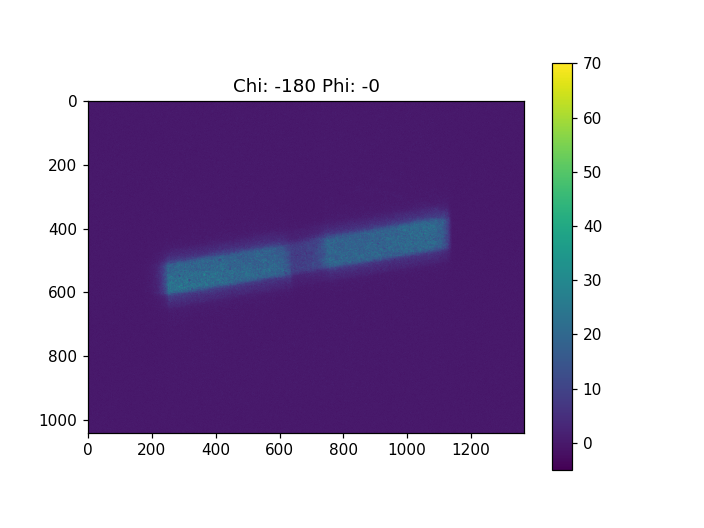

interactive(children=(IntSlider(value=0, description='index', max=59), Output()), _dom_classes=('widget-intera…

In [30]:
#Si 555

scan = 392041 # looks nicer than chi 90 (next one)
#scan = 392042

sample_out = 392043
dark = 392034

i, j, r = 482, 696, 40

ippdate = '2022-9-23'


### dark field data data
d(dark)
npts = len(d.x)
dark_data = 0
for imno in range(1, npts+1):
    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (dark, imno)
    dark_data += np.array(Image.open(datadir+file))
dark_data = dark_data / npts # take mean


### no_sample data
d(sample_out)
npts = len(d.x)
no_sample_data = 0
for imno in range(1, npts+1):
    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (sample_out, imno)
    no_sample_data += np.array(Image.open(datadir+file))
no_sample_data = no_sample_data / npts # take mean

mask = create_mask(no_sample_data, [i, j, r], mask_type = 'disk', minval = 0) # use minval = 0.2 to see image with roi (but change it back!)

d(scan)
npts = len(d.chi)
imstack = []
labels = []
roi_sum_minus_nosample =[]
roi_sum = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))
    
    #imstack += [imdat] # no correction or normalization
    imstack += [(imdat - dark_data) / d.t[imno-1] * 1000 ] # correct for count time and dark-field data
    #imstack += [(imdat - no_sample_data) / d.t[imno-1] * 1000 ]# correct for count time and no-sample data
    #imstack += [(imdat - no_sample_data) * mask / d.t[imno-1] * 1000 ] # use this to see roi (comment out previous line)
    
    roi_sum += [np.sum((imdat - dark_data) * mask / d.t[imno-1] * 1000)]
    roi_sum_minus_nosample += [np.sum((imdat - no_sample_data) * mask / d.t[imno-1] * 1000)]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.chi[imno-1], d.fc_fcPhi)]
    
imstack = np.array(imstack)

volume_slicer(imstack, labels = labels, levels = [-5, 70])
#volume_slicer(imstack, labels = labels)
roi_sum_si555 = roi_sum
roi_sum_si555_minus_nosample = roi_sum_minus_nosample

#figure()
#plot(d.chi, roi_sum); xlabel('chi'); ylabel('ROI sum'); title('ROI vs chi with no-sample data subtracted')

<IPython.core.display.Javascript object>


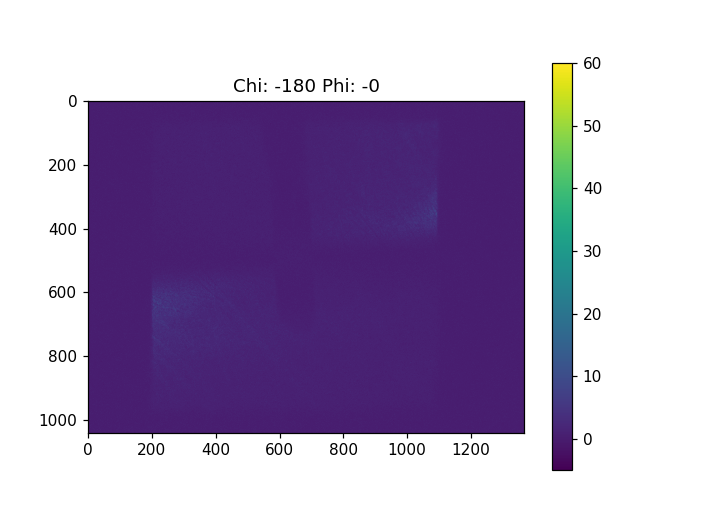

interactive(children=(IntSlider(value=0, description='index', max=59), Output()), _dom_classes=('widget-intera…

<IPython.core.display.Javascript object>


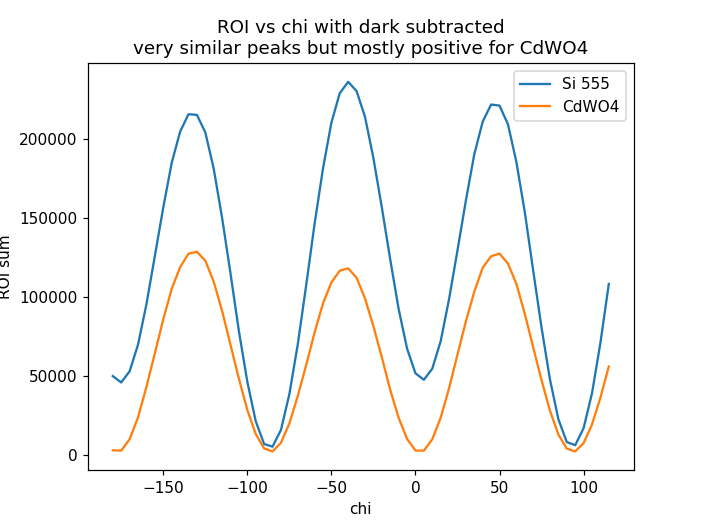

<IPython.core.display.Javascript object>


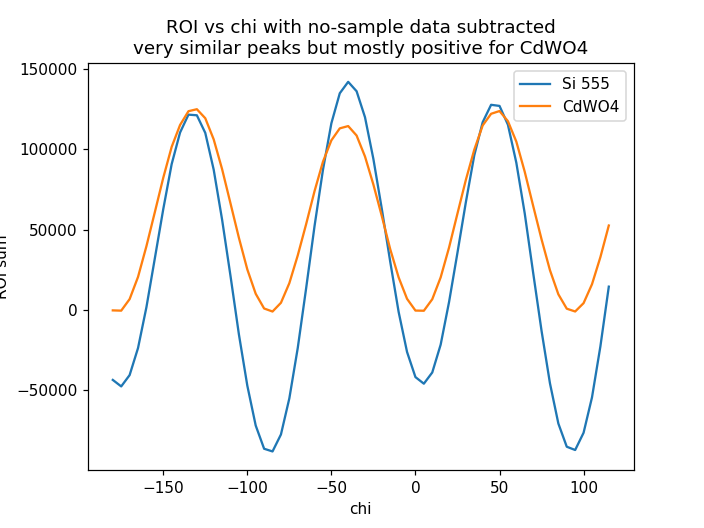

Text(0.5, 1.0, 'ROI vs chi with no-sample data subtracted\nvery similar peaks but mostly positive for CdWO4')

In [31]:
# need to run previous cell

# CdWO4 090
# chi scans #392085,86
dark = 392088

i, j, r = 521, 650, 40

sample_out = 392087

scan = 392085
#scan = 392086

ippdate = '2022-9-23'


### dark field data data
d(dark)
npts = len(d.x)
dark_data = 0
for imno in range(1, npts+1):
    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (dark, imno)
    dark_data += np.array(Image.open(datadir+file))
dark_data = dark_data / npts # take mean


### no_sample data
d(sample_out)
npts = len(d.x)
no_sample_data = 0
for imno in range(1, npts+1):
    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (sample_out, imno)
    no_sample_data += np.array(Image.open(datadir+file))
no_sample_data = no_sample_data / npts # take mean


mask = create_mask(no_sample_data, [i, j, r], mask_type = 'disk', minval = 0) # use minval = 0.2 to see image with roi (but change it back!)

d(scan)
npts = len(d.chi)
imstack = []
labels = []
roi_sum_minus_nosample =[]
roi_sum = []

for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))
    
    #imstack += [imdat] # no correction or normalization
    imstack += [(imdat - dark_data) / d.t[imno-1] * 1000 ] # correct for count time and dark-field data
    #imstack += [(imdat - no_sample_data) / d.t[imno-1] * 1000 ]# correct for count time and no-sample data
    #imstack += [(imdat - no_sample_data) * mask / d.t[imno-1] * 1000 ] # use this to see roi (comment out previous line)
    
    roi_sum += [np.sum((imdat - dark_data) * mask / d.t[imno-1] * 1000)]
    roi_sum_minus_nosample += [np.sum((imdat - no_sample_data) * mask / d.t[imno-1] * 1000)]
    
    labels += ['Chi: %.0f Phi: %.0f' % (d.chi[imno-1], d.fc_fcPhi)]


imstack = np.array(imstack)

roi_sum_cdwo4 = roi_sum
roi_sum_cdwo4_minus_nosample = roi_sum_minus_nosample

volume_slicer(imstack, labels = labels, levels = [-5, 60])
#volume_slicer(imstack, labels = labels)

figure()
plot(d.chi, roi_sum_si555, label='Si 555');
plot(d.chi, roi_sum_cdwo4, label='CdWO4'); xlabel('chi'); ylabel('ROI sum'); legend(); 
title('ROI vs chi with dark subtracted\nvery similar peaks but mostly positive for CdWO4')

figure()
plot(d.chi, roi_sum_si555_minus_nosample, label='Si 555');
plot(d.chi, roi_sum_cdwo4_minus_nosample, label='CdWO4'); xlabel('chi'); ylabel('ROI sum'); legend(); 
title('ROI vs chi with no-sample data subtracted\nvery similar peaks but mostly positive for CdWO4')


## >>> to here 3/11/22

In [32]:
#change to Cu K-edge CdWO4 060 - look at Cu acac first

In [33]:
#Cu acac Cu K edge

#chi = 0, phi = 0
#392095
#scan energy 8959 9050 .5 rc ai1 ai2 0.1
#chi = -45, phi = 0
#392096
#scan energy 8959 9050 .5 rc ai1 ai2 0.1
#chi = -90, phi = 0
#392097
#scan energy 8959 9050 .5 rc ai1 ai2 0.1
#pos chi -90 phi 90
#scan energy 8959 9050 .5 rc ai1 ai2 0.1
#pos chi -45 phi 90
#scan energy 8959 9050 .5 rc ai1 ai2 0.1
#pos chi 0 phi 90
#scan energy 8959 9050 .5 rc ai1 ai2 0.1

#chi = -45

#scan phi -90 90 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
# pos phi -30 #max
#scan chi -90 90 5 phi ai1 rc checkbeam ipp2 4000 ipp2roi1

# beam on; sample out
#392123
#scan x 1 10 1 ai1 rc checkbeam ipp2 4000 ipp2roi1
# roi 598, 506, 26, 26
# beam off (dark)
#scan x 1 10 1 ai1 rc ipp2 4000 ipp2roi1

#392126
#for chival in arange(-180, 115.1, 10): 
#    pos chi chival
#    scan phi -148 147 10 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
# roi still slightly big for thinner cross-sections




<IPython.core.display.Javascript object>


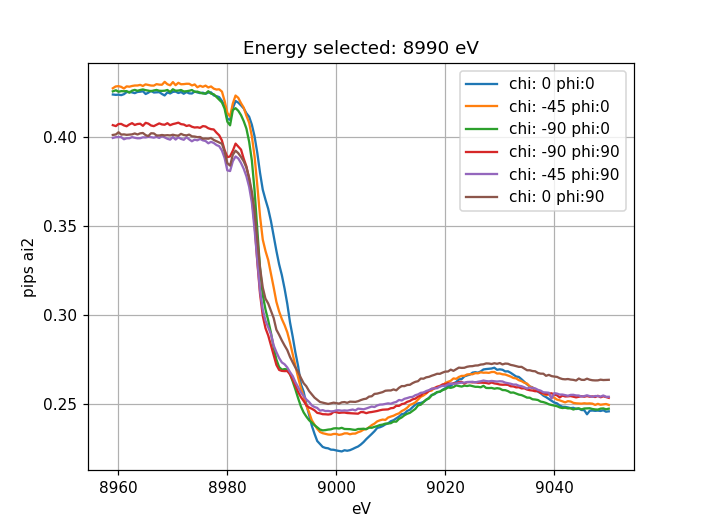

In [34]:
figure()
for scan in range(392095, 392100+1):
    d(scan)
    labtxt = 'chi: %.0f phi:%.0f' % (d.fc_fcChi, d.fc_fcPhi)
    plot(d.energy, d.ai2, label = labtxt); xlabel('eV'); ylabel('pips ai2'); title('Energy selected: 8990 eV')
grid()
legend()

<IPython.core.display.Javascript object>


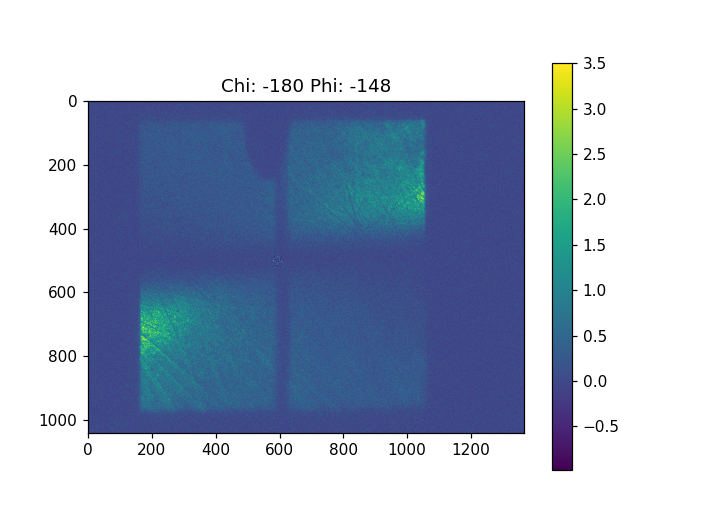

interactive(children=(IntSlider(value=0, description='index', max=899), Output()), _dom_classes=('widget-inter…

In [35]:
scans = range(392127, 392156+1)
dark = 392125

# from logbook p161 roi = 595, 503, 32, 32 (unless that was the next measurement)
i, j, r = 503, 595, 20
ippdate = '2022-9-23'


### dark field data data
d(dark)
npts = len(d.x)
dark_data = 0
for imno in range(1, npts+1):
    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (dark, imno)
    dark_data += np.array(Image.open(datadir+file))
dark_data = dark_data / npts # take mean

mask = create_mask(dark_data, [i, j, r], mask_type = 'disk', minval = .2) # use minval = 0.2 to see image with roi (but change it back!)

imstack = []
labels = []
roi_sum_minus_nosample =[]
roi_sum = []

for scan in scans: 
    d(scan)
    npts = len(d.chi)

    for imno in range(1, npts+1):

        file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
        imdat = np.array(Image.open(datadir+file))

        #imstack += [imdat] # no correction or normalization
        #imstack += [(imdat - dark_data) / d.t[imno-1] * 1000 ] # correct for count time and dark-field data

        imstack += [(imdat - dark_data) / d.t[imno-1] * 1000 * mask] # see mask

        labels += ['Chi: %.0f Phi: %.0f' % (d.chi[imno-1], d.fc_fcPhi)]
    
imstack = np.array(imstack)

#volume_slicer(imstack, labels = labels, levels = [5, 7])
volume_slicer(imstack, labels = labels)

<IPython.core.display.Javascript object>


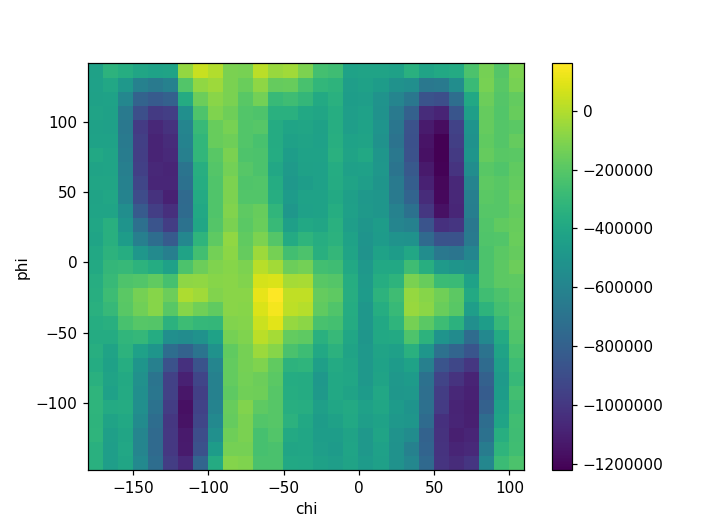

In [36]:
d(392123)
dark = np.mean(d.ipp2roi1_sum)

roi1, chi, phi = [], [], []

for scan in range(392127, 392156+1):
    d(scan)
    roi1 += [d.ipp2roi1_sum - dark]
    chi += [d.chi]
    phi += [d.phi]
    
figure()
#imshow(np.array(roi1))
#imshow()
pcolor(np.array(chi), np.array(phi), np.array(roi1)); xlabel('chi'); ylabel('phi'); colorbar()


In [37]:
d.energy

8989.995

In [38]:
#CuBr2 Cu K edge
# energy = 8990
#sample marked with black spot on pin where beam would hit for phi = 0
#392164
#for chival in arange(-180, 115.1, 5): 
#    pos chi chival
#    scan phi -148 147 5 chi ai1 rc checkbeam ipp2 4000 ipp2roi1
# ended 392223


#### need to measure absorption spectra ??

<IPython.core.display.Javascript object>


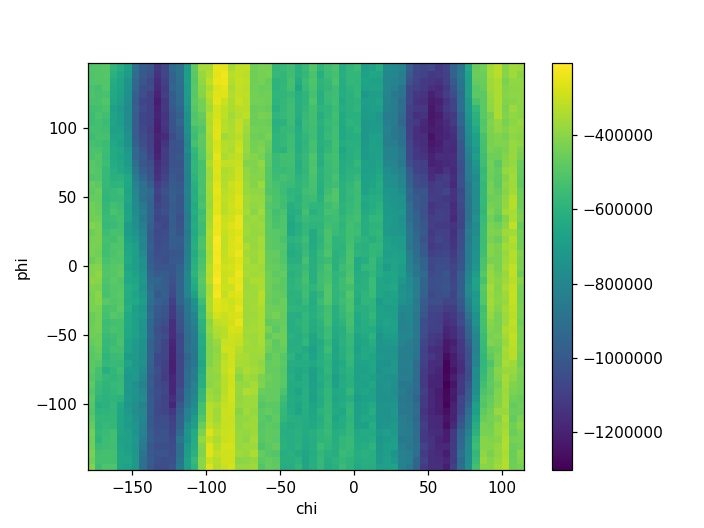

In [39]:
#CuBr2 roi data - just showing shape changes (birefringence small and around the edges)
d(392123)
dark = np.mean(d.ipp2roi1_sum)

roi1, chi, phi = [], [], []

for scan in range(392164, 392223+1):
    d(scan)
    roi1 += [d.ipp2roi1_sum - dark]
    chi += [d.chi]
    phi += [d.phi]
    
figure()
#imshow(np.array(roi1))
#imshow()
pcolor(np.array(chi), np.array(phi), np.array(roi1)); xlabel('chi'); ylabel('phi'); colorbar()


<IPython.core.display.Javascript object>


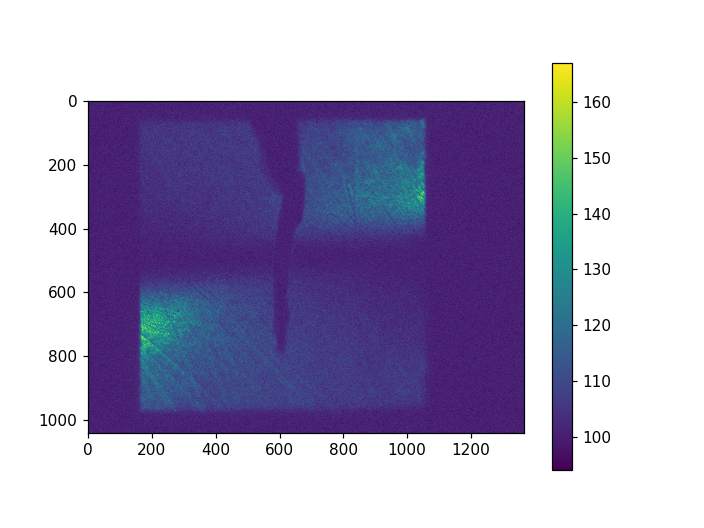

interactive(children=(IntSlider(value=0, description='index', max=27), Output()), _dom_classes=('widget-intera…

In [40]:
#Images from CuBr2 Cu K
#images vs chi
from PIL import Image

scan = 391871
imno = 10
ippdate = '2022-9-23'

imstack = []
#for scan in range(392164, 392223+1):
for scan in range(392164, 392192): # rest of images in next day's folder
    
    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
imstack = np.array(imstack)

volume_slicer(imstack)

<IPython.core.display.Javascript object>


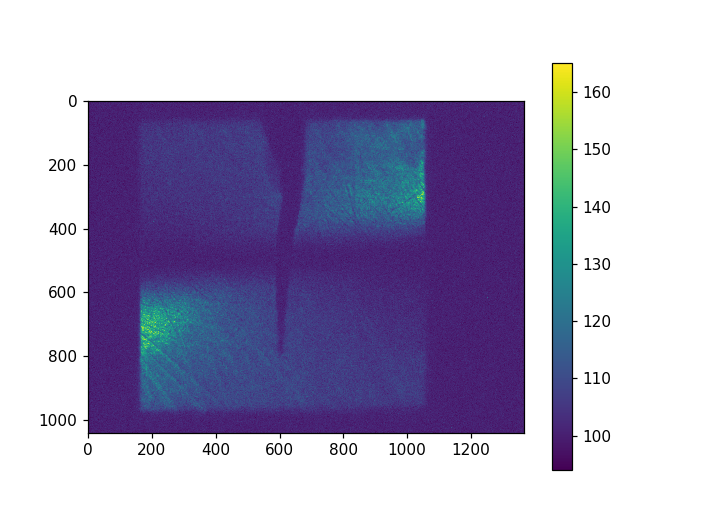

interactive(children=(IntSlider(value=0, description='index', max=59), Output()), _dom_classes=('widget-intera…

In [41]:
#Images from CuBr2 Cu K
#images vs phi
from PIL import Image

scan = 392164
npts = len(d(scan).rc)

ippdate = '2022-9-23'

imstack = []
for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
imstack = np.array(imstack)

volume_slicer(imstack)

<IPython.core.display.Javascript object>


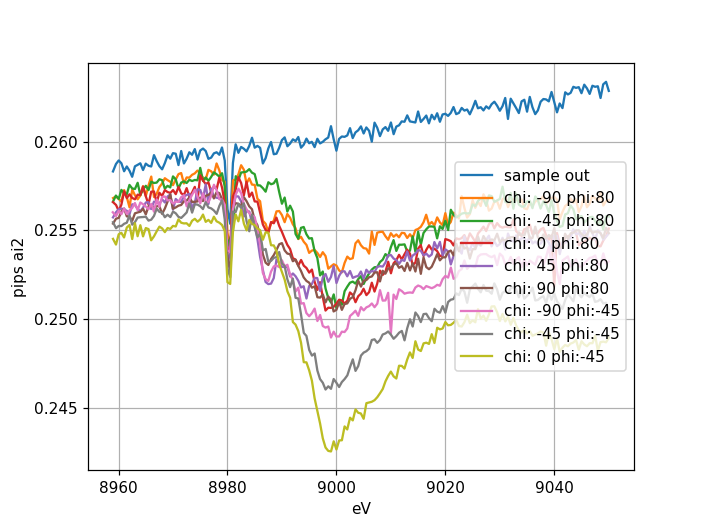

In [42]:
#CuQ2TCNQ Cu K edge absorptio .1 x .1 slit
figure()
d(392225)
plot(d.energy, d.ai2, label='sample out'); xlabel('eV'); ylabel('pips ai2')
for scan in range(392227, 392234+1):
    d(scan)
    labtxt = 'chi: %.0f phi:%.0f' % (d.fc_fcChi, d.fc_fcPhi)
    plot(d.energy, d.ai2, label=labtxt); xlabel('eV'); ylabel('pips ai2')
grid()
legend(loc='right')

<IPython.core.display.Javascript object>


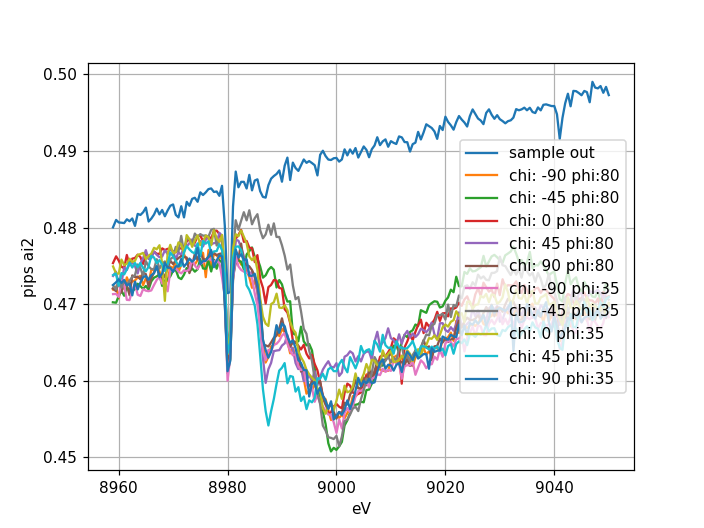

In [43]:
#CuQ2TCNQ Cu K edge absorptio .2 x .2 slit
figure()
d(392239)
plot(d.energy, d.ai2, label='sample out'); xlabel('eV'); ylabel('pips ai2')
for scan in range(392240, 392249+1):
    d(scan)
    labtxt = 'chi: %.0f phi:%.0f' % (d.fc_fcChi, d.fc_fcPhi)
    plot(d.energy, d.ai2, label=labtxt); xlabel('eV'); ylabel('pips ai2')
grid()
legend(loc='right')

# sharp dichroic peak ~ 8987.25 eV

<IPython.core.display.Javascript object>


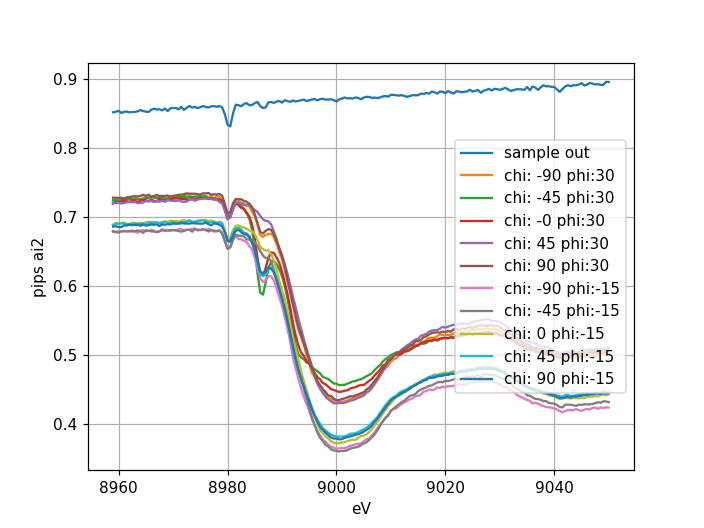

In [44]:
#CuTPP on tape  .2 x .2 slit

figure()
d(392250)
plot(d.energy, d.ai2, label='sample out'); xlabel('eV'); ylabel('pips ai2')
for scan in range(392251, 392260+1):
    d(scan)
    labtxt = 'chi: %.0f phi:%.0f' % (d.fc_fcChi, d.fc_fcPhi)
    plot(d.energy, d.ai2, label=labtxt); xlabel('eV'); ylabel('pips ai2')
grid()
legend(loc='right')

# sharp dichroic peak ~ 8986.3 eV

<IPython.core.display.Javascript object>


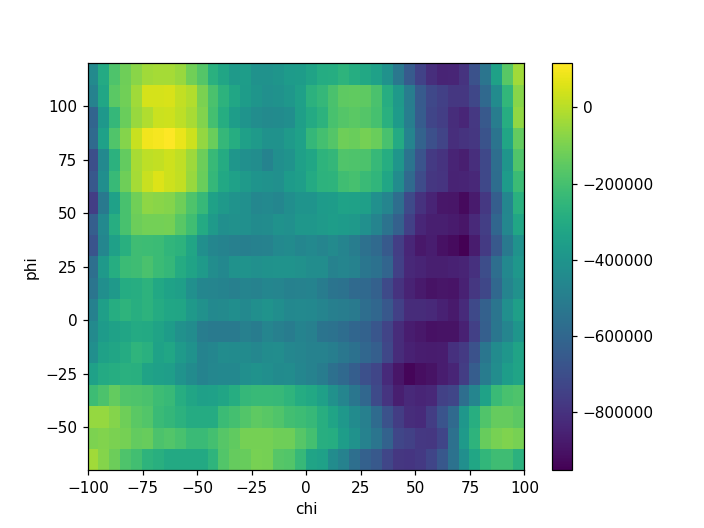

In [45]:
d(392123)
dark = np.mean(d.ipp2roi1_sum)

roi1, chi, phi = [], [], []

for scan in range(392275, 392294+1):
    d(scan)
    roi1 += [d.ipp2roi1_sum - dark]
    chi += [d.chi]
    phi += [d.chi * 0 + d.fc_fcPhi]
    
figure()
#imshow(np.array(roi1))
#imshow()
pcolor(np.array(chi), np.array(phi), np.array(roi1)); xlabel('chi'); ylabel('phi'); colorbar()
#pcolor(np.array(roi1)); 
#xlabel('chi'); ylabel('phi'); colorbar()

<IPython.core.display.Javascript object>


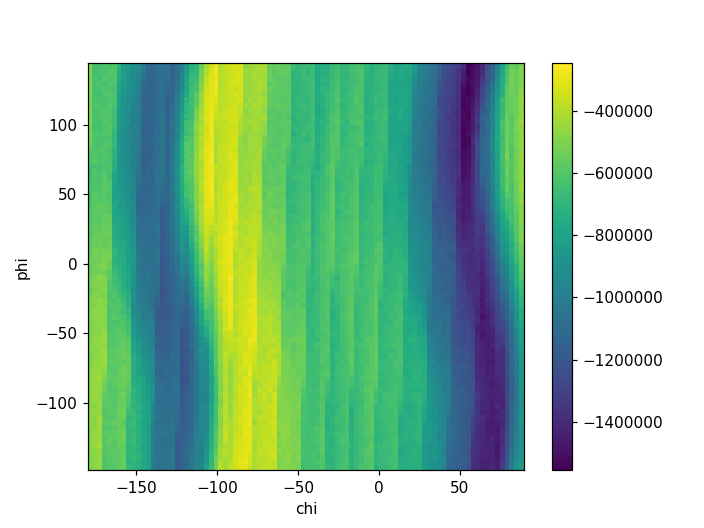

In [46]:
d(392123)
dark = np.mean(d.ipp2roi1_sum) # change to more recent dark

roi1, chi, phi = [], [], []

for scan in range(392307, 392397+1):
    d(scan)
    roi1 += [d.ipp2roi1_sum - dark]
    chi += [d.chi]
    phi += [d.phi]
    
figure()
pcolor(np.array(chi), np.array(phi), np.array(roi1)); xlabel('chi'); ylabel('phi'); colorbar()
# looks off but small sample c.f. roi.

<IPython.core.display.Javascript object>


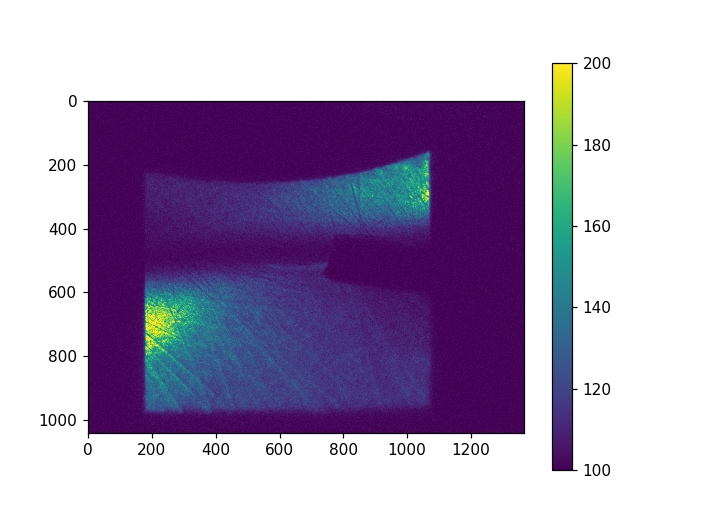

interactive(children=(IntSlider(value=0, description='index', max=633), Output()), _dom_classes=('widget-inter…

In [47]:
#Images from CuQ2TCNQ Cu K on cooling and heating

from PIL import Image

scan = 392432
npts = len(d(scan).rc)

ippdate = '2022-9-25'

imstack = []
for imno in range(1, npts+1):

    file = 'ippimages/' + ippdate + '/ipp_%i_%i.TIF' % (scan, imno)
    imdat = np.array(Image.open(datadir+file))

    imstack += [imdat]
imstack = np.array(imstack)

volume_slicer(imstack, [100, 200])

<IPython.core.display.Javascript object>


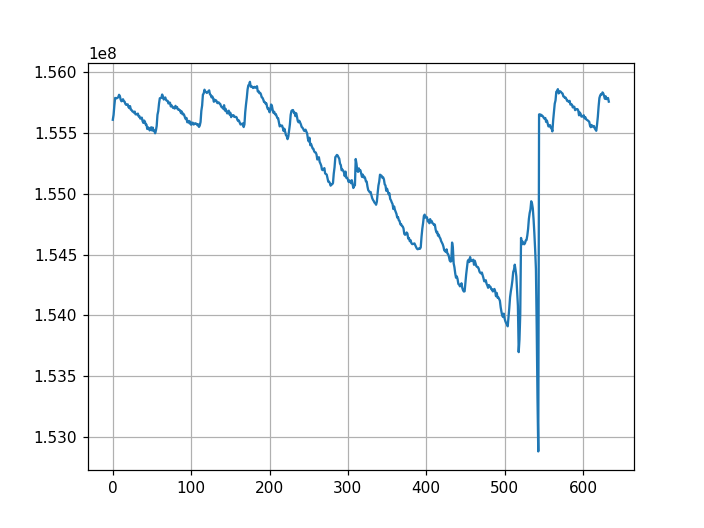

In [48]:
#counts in thin roi vs time; temp going down; 170K for a long time then up to 300K
#intensity reduction seems to be due to ice
#data at end look consistent with data taken before cycling
d(392432)
figure()
plot(d.ipp2roi1_sum)
grid()

<IPython.core.display.Javascript object>


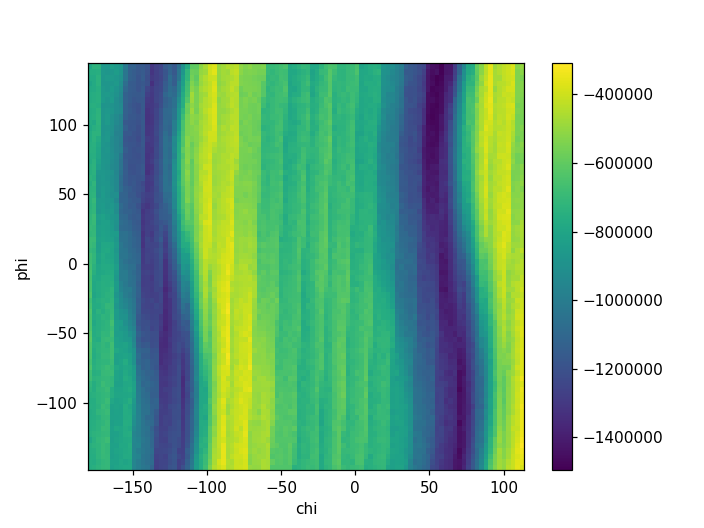

In [49]:
d(392123)
dark = np.mean(d.ipp2roi1_sum) # change to more recent dark

roi1, chi, phi = [], [], []

for scan in range(392437, 392535+1):
    d(scan)
    roi1 += [d.ipp2roi1_sum - dark]
    chi += [d.chi]
    phi += [d.phi]
    
figure()
pcolor(np.array(chi), np.array(phi), np.array(roi1)); xlabel('chi'); ylabel('phi'); colorbar()
# same as measurements before cycling tempterature?

<IPython.core.display.Javascript object>


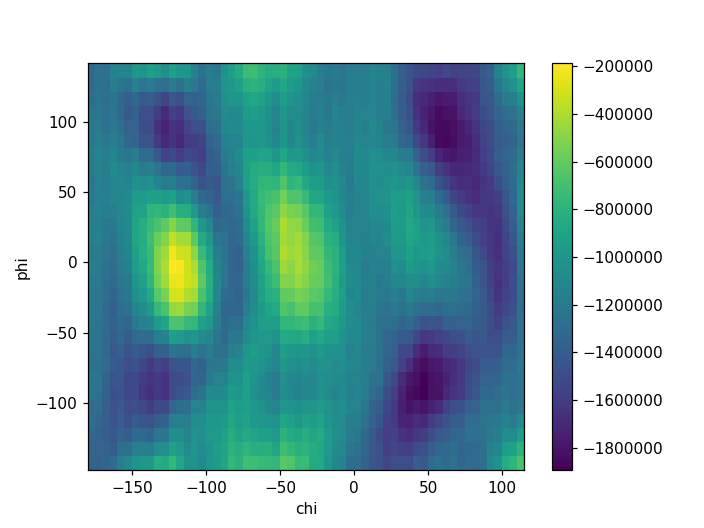

In [50]:
#Sample - #6 - Tetrabromobenzene
# at Br K-edge
d(392123)
dark = np.mean(d.ipp2roi1_sum) # change to more recent dark

roi1, chi, phi = [], [], []

for scan in range(392655, 392714+1):
    d(scan)
    roi1 += [d.ipp2roi1_sum - dark]
    chi += [d.chi]
    phi += [d.phi]
    
figure()
pcolor(np.array(chi), np.array(phi), np.array(roi1)); xlabel('chi'); ylabel('phi'); colorbar()
# same as measurements before cycling tempterature?
#taking 4 mins per chi (should be ~ 4 hours total)

In [51]:
def lastscan(first):
    count = first
    nbads = 4 # number of consecutive missing files before we assume we have found the end
    while nbads>0:
        count+=1
        try:
            d(count)
            last = count
        except:
            nbads-=1
    print('#%i: %s: %s' % (scan, d.date, d.cmd))

lastscan(392699)
d.fc_fcChi

#392714: Tue Sep 27 11:10:04 2022: scan x 1 1 1 zyla 0.1


-180.0

In [52]:
#392729-788

<IPython.core.display.Javascript object>


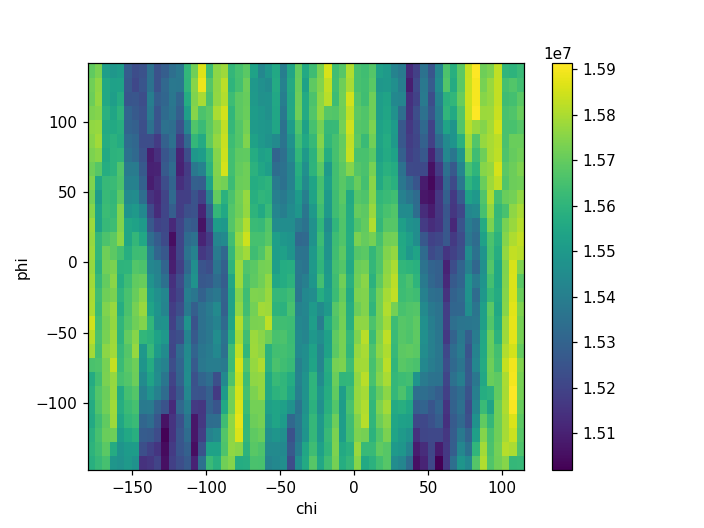

In [53]:
#sample 3: p-dibromobenzene (a bit of a forest)
d(392728)
dark = np.mean(d.ipp2roi1_sum)

roi1, chi, phi = [], [], []

for scan in range(392729, 392788+1):
    d(scan)
    roi1 += [d.ipp2roi1_sum - dark]
    chi += [d.chi]
    phi += [d.phi]
    
figure()
pcolor(np.array(chi), np.array(phi), np.array(roi1)); xlabel('chi'); ylabel('phi'); colorbar()

#sample 3: p-dibromobenzene (a bit of a forest)
from PIL import Image

ippdate = ['2022-9-26', '2022-9-27'] # scan goes over two dates
imstack = []
#scan = 391935
for scan in range(392729, 392788+1):
    npts = len(d(scan).rc)
    for imno in range(1, npts+1):
        try:
            file = 'ippimages/' + ippdate[0] + '/ipp_%i_%i.TIF' % (scan, imno)
            imdat = np.array(Image.open(datadir+file))
        except:
            file = 'ippimages/' + ippdate[1] + '/ipp_%i_%i.TIF' % (scan, imno)
            imdat = np.array(Image.open(datadir+file))
        imstack += [imdat]

imstack = np.array(imstack)
volume_slicer(imstack)


# nothing much there ...
# enhance colour scale



# Data summary

| Sample | date | logbook | measurements | scans | results |
| --- | --- | --- | --- | --- | --- |
| 1-Bromoadamantane/thiourea | 21/9/22 | P148 |  dichroism | 391724-25 | good dichroism |
| 1-Bromoadamantane/thiourea | 21/9/22 | P149 |  dichroism, XBI (CdWO4) | 745-840 | good dichroism; select energy for XBI <br> good XBI (CdWO4 works well) |
| CuBr2 | 21/9/22 | P151 | XBI chi/phi | 871-886 | sample is a brick, even at reduced energy<br>edges are bright |
| bromocyclohexane/thiourea | 22/9/22 | P153 | XBI @Low T phi scans chi=0, -90<br>Warming/cooling various chi/phi | 918-935 | good XBI vs temp<br>domains change each cycle |
| CuBr2 (thinner sample)<br> Br K egde | 23/9/22 | P154 | XBI |978, 79 (phi scans)<br>980, 84 (chi scans) | mostly bright near edges<br>last scan bright in volume? |
| 1-Bromoadamantane/thiourea Si 555 | 23/9/22  | 156 | XBI vs chi | 392041, 42 | compare analysers with standadr sample |
| 1-Bromoadamantane/thiourea CdWO4 |  23/9/22 | 157 | XBI vs chi | 392085, 86 | compare analysers with standadr sample<br> roi sum shown with no-sample and dark field data subtracted <br> not clear which analyser is best but CdWO4 is almost entirely bright (and can do Cu K)|
|  |  |  |  |  |  |
|  |  |  |  |  |  |
|  |  |  |  |  |  |



In [54]:
########### rewrite volume slicer with optional max/min values and no autoscaling - done
########### try removing dark or no-sample images


In [55]:
############## sort out slicing for ROIs ############ plot integrals vs temp